# Heart stroke prediction


In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('heart_disease_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Basic checks

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum() #no null values and missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
duplicate_rows = data[data.duplicated()]  # duplicate row present 
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
data = data.drop([164],axis =0)  # droping it

In [9]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [10]:
data['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
125     7
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [11]:
data['cp'].value_counts() 


cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [12]:
data['fbs'].value_counts()


fbs
0    257
1     45
Name: count, dtype: int64

In [13]:
data['restecg'].value_counts()


restecg
1    151
0    147
2      4
Name: count, dtype: int64

In [14]:
data['exang'].value_counts()


exang
0    203
1     99
Name: count, dtype: int64

In [15]:
data['slope'].value_counts()


slope
2    141
1    140
0     21
Name: count, dtype: int64

In [16]:
data['ca'].value_counts()


ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

In [17]:
data['thal'].value_counts()


thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

In [18]:
data['target'].value_counts()



target
1    164
0    138
Name: count, dtype: int64

# EDA

In [19]:
# Auto Exploratory data analysis 
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(data,title = 'eda',explorative = False)
profile

Defaulting to user installation because normal site-packages is not writeable


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
data.age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

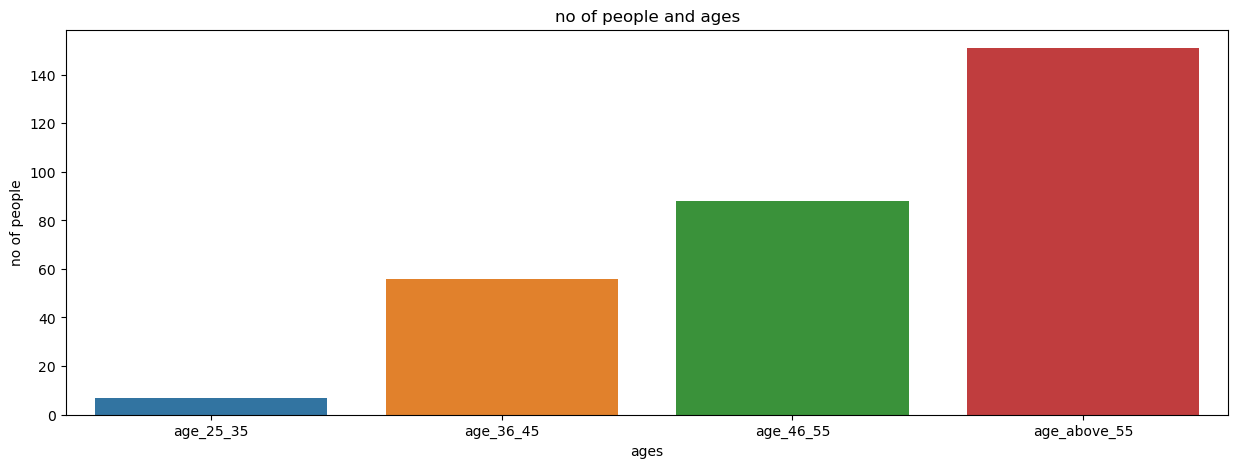

In [21]:
age_25_35 = data['age'][(data['age'] >=25) & (data['age'] <=35)] 
age_36_45 = data['age'][(data['age'] >=36) & (data['age'] <=45)]   
age_46_55 = data['age'][(data['age'] >=46) & (data['age'] <=55)] 
age_above_55 = data['age'][data['age'] >=56]       

x =  ['age_25_35','age_36_45','age_46_55','age_above_55']
y = [len(age_25_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,5))
sns.barplot(x = x, y = y ,data = data)
plt.title('no of people and ages')
plt.xlabel('ages')
plt.ylabel('no of people')
plt.show()

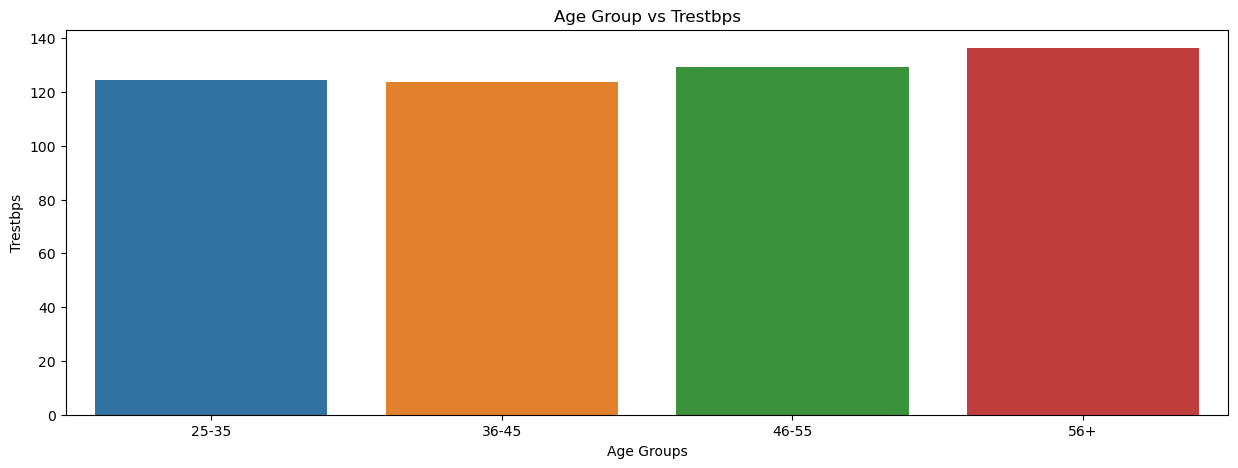

In [22]:
age_group_data = data.groupby(
    pd.cut(
        data['age'],
        bins=[24, 35, 45, 55, float('inf')],
        labels=['25-35', '36-45', '46-55', '56+']
    )
)['trestbps'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x='age', y='trestbps', data=age_group_data)
plt.title('Age Group vs Trestbps')
plt.xlabel('Age Groups')
plt.ylabel('Trestbps')
plt.show()


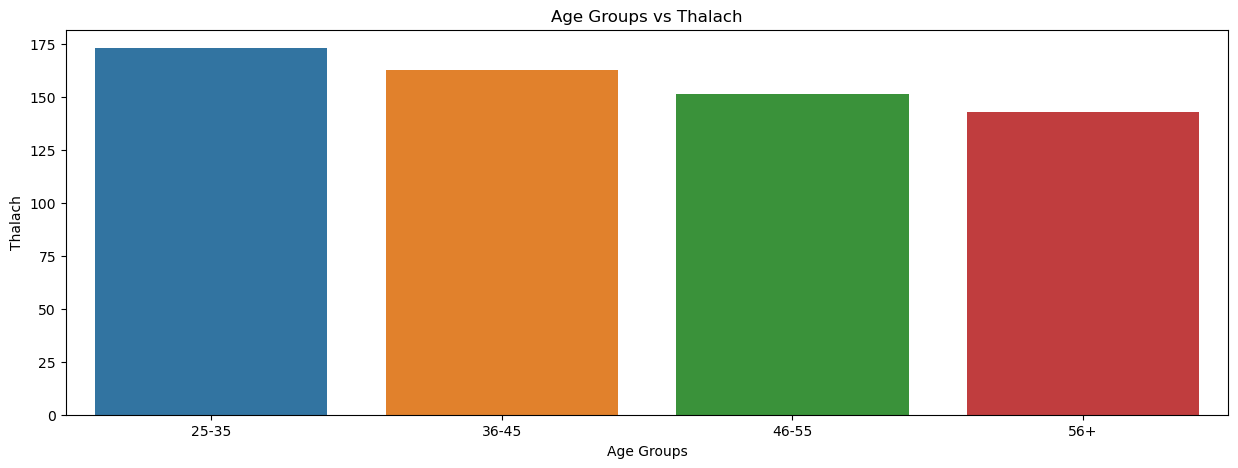

In [23]:
age_group_data = data.groupby(
    pd.cut(
        data['age'],
        bins=[24, 35, 45, 55, float('inf')],
        labels=['25-35', '36-45', '46-55', '56+']
    )
)['thalach'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x='age', y='thalach', data=age_group_data)
plt.title('Age Groups vs Thalach')
plt.xlabel('Age Groups')
plt.ylabel('Thalach')
plt.show()


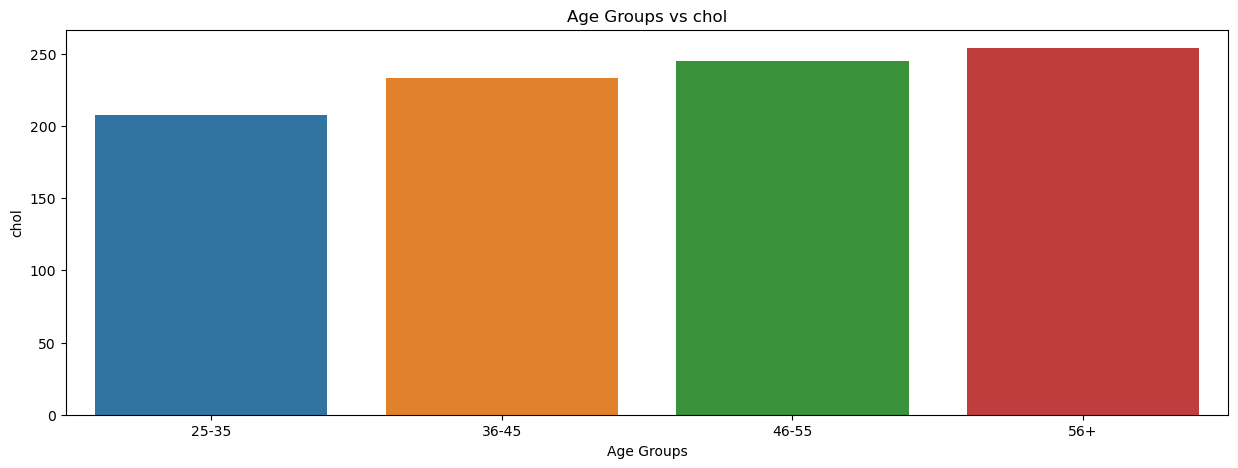

In [24]:
age_group_data = data.groupby(
    pd.cut(
        data['age'],
        bins=[24, 35, 45, 55, float('inf')],
        labels=['25-35', '36-45', '46-55', '56+']
    )
)['chol'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x='age', y='chol', data=age_group_data)
plt.title('Age Groups vs chol')
plt.xlabel('Age Groups')
plt.ylabel('chol')
plt.show()


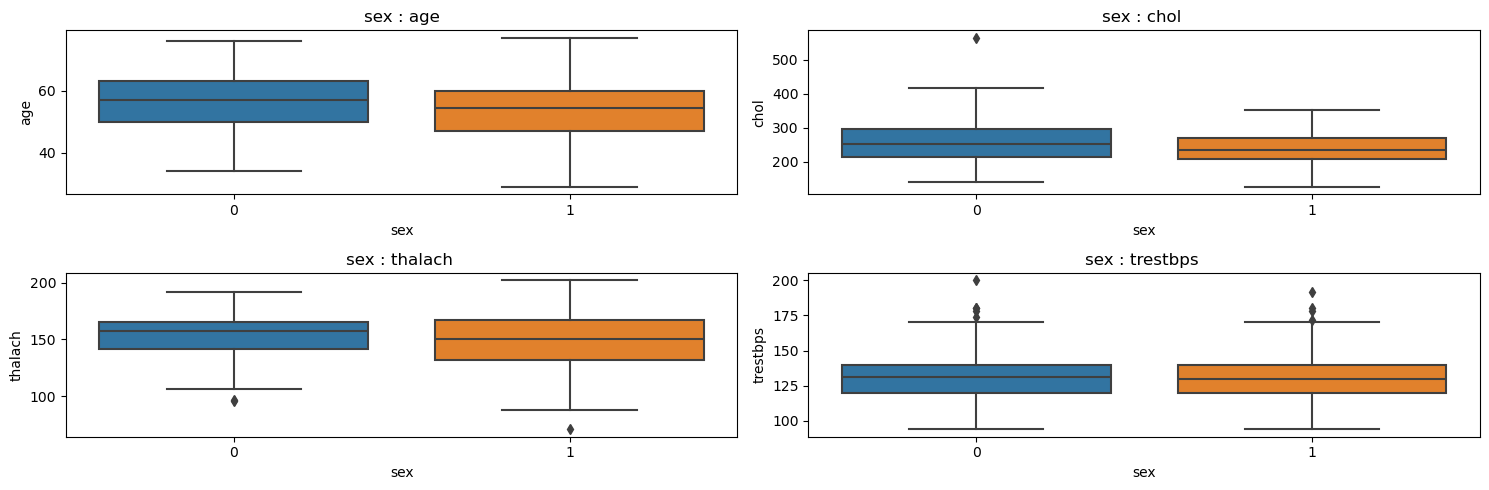

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(2, 2, 1)
sns.boxplot(x = 'sex', y ='age', data = data)
plt.title('sex : age')

plt.subplot(2, 2, 2)
sns.boxplot(x = 'sex', y = 'chol', data = data)
plt.title('sex : chol ')

plt.subplot(2, 2, 3)
sns.boxplot(x = 'sex', y = 'thalach', data = data)
plt.title('sex : thalach ')

plt.subplot(2, 2, 4)
sns.boxplot(x = 'sex', y = 'trestbps', data = data)
plt.title('sex : trestbps ')

plt.tight_layout()
plt.show()

In [26]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


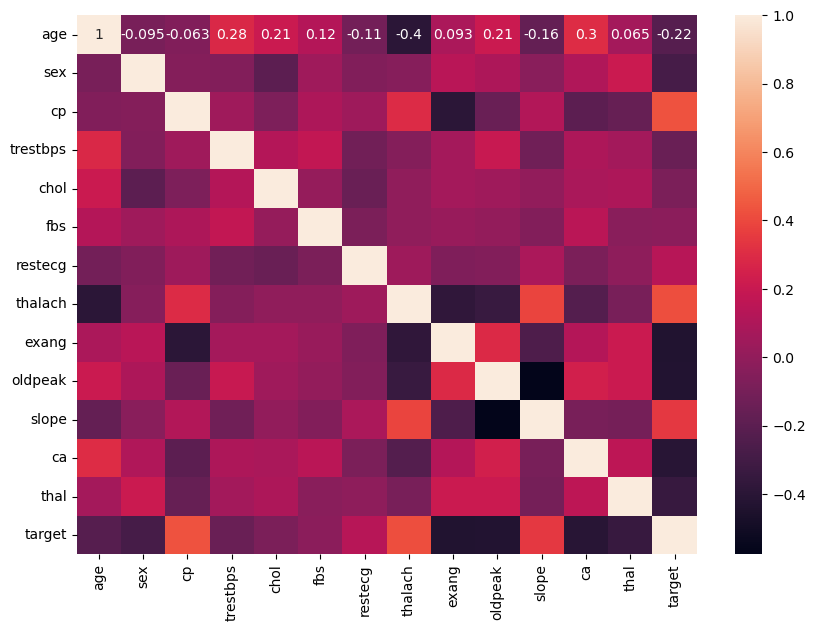

In [33]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot = True ) # exang ,oldpeak are least correlated to target we will drop them
plt.show()

In [34]:
data= data.drop(columns= ['exang','oldpeak'],axis =1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,2,1
2,41,0,1,130,204,0,0,172,2,0,2,1
3,56,1,1,120,236,0,1,178,2,0,2,1
4,57,0,0,120,354,0,1,163,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,3,0
299,45,1,3,110,264,0,1,132,1,0,3,0
300,68,1,0,144,193,1,1,141,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,3,0


### Minmax scaling

In [35]:
m = MinMaxScaler()
data['age'] = m.fit_transform(data[['age']])
data['trestbps'] = m.fit_transform(data[['trestbps']])
data['chol'] = m.fit_transform(data[['chol']])
data['thalach'] = m.fit_transform(data[['thalach']])

In [36]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.433962,0.262557,0,1,0.396947,1,0,3,0
299,0.333333,1,3,0.150943,0.315068,0,1,0.465649,1,0,3,0
300,0.812500,1,0,0.471698,0.152968,1,1,0.534351,1,2,3,0
301,0.583333,1,0,0.339623,0.011416,0,1,0.335878,1,1,3,0


# spliting the data

In [37]:
X = data.drop(columns=['target'])  
y = data['target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model

In [39]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# prediction and evaluation

In [40]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 88.52%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[26  3]
 [ 4 28]]


# hyperparameter tuning

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_classifier = grid_search.best_estimator_

y_pred_best = best_rf_classifier.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with tuned model: {accuracy_best * 100:.2f}%")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with tuned model: 90.16%


## Output

In [10]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,2,1
2,41,0,1,130,204,0,0,172,2,0,2,1
3,56,1,1,120,236,0,1,178,2,0,2,1
4,57,0,0,120,354,0,1,163,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,3,0
299,45,1,3,110,264,0,1,132,1,0,3,0
300,68,1,0,144,193,1,1,141,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,3,0


In [22]:
print("\nEnter the following values for prediction:")

input_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                 'slope', 'ca', 'thal']

custom_input = []

for col in input_columns:
    if col == 'age':
        value = float(input("Enter age (in years): "))
    elif col == 'sex':
        value = int(input("Enter sex (1 for male, 0 for female): "))
    elif col == 'cp':
        value = int(input("Enter chest pain type (0-3): "))
    elif col == 'trestbps':
        value = float(input("Enter resting blood pressure (in mm Hg): "))
    elif col == 'chol':
        value = float(input("Enter serum cholesterol (in mg/dl): "))
    elif col == 'fbs':
        value = int(input("Enter fasting blood sugar (1 if >120 mg/dl, else 0): "))
    elif col == 'restecg':
        value = int(input("Enter resting ECG results (0-2): "))
    elif col == 'thalach':
        value = float(input("Enter maximum heart rate achieved: "))
    elif col == 'slope':
        value = int(input("Enter slope of the peak exercise ST segment (0-2): "))
    elif col == 'ca':
        value = int(input("Enter number of major vessels (0-4): "))
    elif col == 'thal':
        value = int(input("Enter thalassemia (1: normal, 2: fixed defect, 3: reversible defect): "))
    
    custom_input.append(value)

custom_input = [custom_input]  

custom_prediction = best_rf_classifier.predict(custom_input)

if custom_prediction[0] == 1:
    print("\nThe predicted target is: 1 (Positive)")
else:
    print("\nThe predicted target is: 0 (Negative)")
    	



Enter the following values for prediction:


Enter age (in years):  65
Enter sex (1 for male, 0 for female):  0
Enter chest pain type (0-3):  1
Enter resting blood pressure (in mm Hg):  150
Enter serum cholesterol (in mg/dl):  230
Enter fasting blood sugar (1 if >120 mg/dl, else 0):  0
Enter resting ECG results (0-2):  1
Enter maximum heart rate achieved:  180
Enter slope of the peak exercise ST segment (0-2):  0
Enter number of major vessels (0-4):  1
Enter thalassemia (1: normal, 2: fixed defect, 3: reversible defect):  3



The predicted target is: 0 (Negative)
